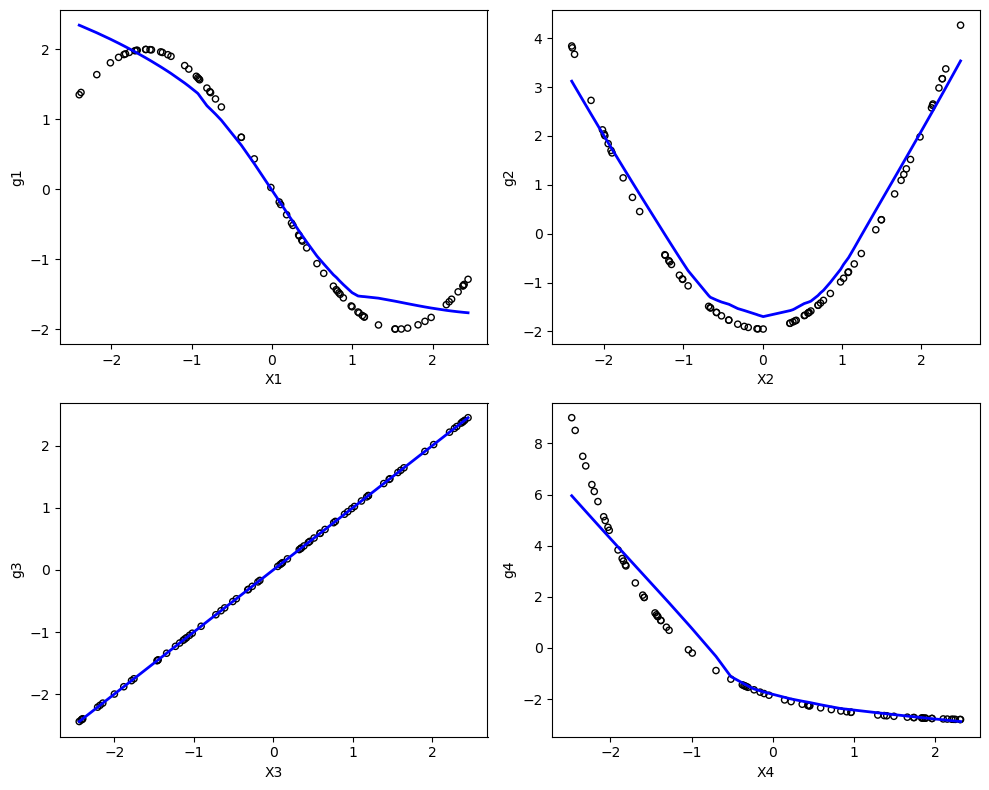

Image saved at: QID-2707-SPMsmootherperformance.png


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Functions as described in the image
def g1(x):
    return -2 * np.sin(x)  # Negative sine function as specified

def g2(x):
    return x**2 - np.mean(x**2)

def g3(x):
    return x

def g4(x):
    return np.exp(-x) - np.mean(np.exp(-x))

# Generate sample data
np.random.seed(0)
n = 75
X = np.random.uniform(-2.5, 2.5, (n, 4))
epsilon = np.random.normal(0, 1, n)
Y = g1(X[:, 0]) + g2(X[:, 1]) + g3(X[:, 2]) + g4(X[:, 3]) + epsilon

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
X_plot = np.linspace(-2.5, 2.5, 100)

# LOWESS Smoothing with less fit
def plot_estimation(ax, X_col, g_func, label):
    # Scatter plot of true values
    ax.scatter(X_col, g_func(X_col), facecolors='none', edgecolors='black', s=20)
    
    # LOWESS for smoothing with reduced fit
    smoothed = lowess(g_func(X_col), X_col, frac=0.6)  # Increased 'frac' for smoother, less accurate fit
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='blue', lw=2)
    ax.set_xlabel(f"{label.split('=')[0].strip()}")
    ax.set_ylabel(f"{label.split('=')[1].strip()}")

# Plot for each function
plot_estimation(axes[0, 0], X[:, 0], g1, "X1 = g1")
plot_estimation(axes[0, 1], X[:, 1], g2, "X2 = g2")
plot_estimation(axes[1, 0], X[:, 2], g3, "X3 = g3")
plot_estimation(axes[1, 1], X[:, 3], g4, "X4 = g4")

# Customize and show plot
for ax in axes.flatten():
    ax.grid(False)  # Remove grid lines

plt.tight_layout()


# Save the plot as an image
output_path = 'QID-2707-SPMsmootherperformance.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# Output the path to the saved image
print("Image saved at:", output_path)